<a href="https://colab.research.google.com/github/huusonbkhcm/Coursera_Capstone/blob/master/IBM_FINAL_PROJECT_EXPLORING_HCM_CITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUCTION

Ho Chi Minh City, Vietnam also commonly referred to as Saigon is the largest city of Vietnam. According to the 2019 census, Ho Chi Minh City has a population of over 8.9 million within city proper and over 21 million within the metropolitan area. Ho Chi Minh City is the economic and financial centre of Vietnam, and plays an important role in the country's culture and scientific developments. Ho Chi Minh City is an emerging international tourist destination, with popular landmarks related to the remnants of its colonial past showcased through colonial architecture [wikipedia]. With the advantage of geography location as well as the delelopment of economic and travelling, Ho Chi Minh city is one of the best place for foreigners for living and investments.

Tom is one of my best foreigner friend who wants to move to Ho Chi Minh City for living the retired life and also want to open a Café shop in Ho Chi Minh to earn the living cost. Because he just came to Vietnam several times, so he does not know much about Ho Chi Minh City life and environment. He knocks my door to ask about Ho Chi Minh City and help him to buy house which has the same convenient place around as his current house in his country. He also asked me to collect the data of extisting coffee shope in Ho Chi Minh city which can help him to prevent openning the coffee shop at which has many coffee shop nearby to reduce the competition.

The business problem:

[1] Find the best place which has the same convenient place as his current house in his country to buy a house

[2] collect the data of extisting coffee shope in Ho Chi Minh city which can help him to prevent openning the coffee shop at which has many coffee shop nearby.



#DATA PREPROCESSING

The data is collected at an open source in Github which has the information of the ward and district of Ho Chi Minh City. In this section, I would like to use some supported code for data processing such as Adding The Latitude and Longitude by call Google Geocode API,  Using the Foursquare API to explore the neighborhoods and See the top 5 venues near by HCM, and Exploratory Data Analysis: Find the most Venue Category in HoCHiMinh City

##1. Importing necessary Libraries

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


##2. Download and Explore Dataset


In [ ]:
df = pd.read_excel ('/content/drive/My Drive/ST/DS/[1] PROJECT/[3] IBM FINAL PROJECT/HoChiMinhCity.xlsx')
df.head()

,Unnamed: 0,ward,district,area
0,9214,Phường Tân Định,Quận 1,"Phường Tân Định, Quận 1"
1,9215,Phường Đa Kao,Quận 1,"Phường Đa Kao, Quận 1"
2,9216,Phường Bến Nghé,Quận 1,"Phường Bến Nghé, Quận 1"
3,9217,Phường Bến Thành,Quận 1,"Phường Bến Thành, Quận 1"
4,9218,Phường Nguyễn Thái Bình,Quận 1,"Phường Nguyễn Thái Bình, Quận 1"


##3. Add The Latitude and Longitude by call Google Geocode API


Find the geograpical coordinate of Ho Chi Minh city

In [ ]:
address = 'Ho Chi Minh, VN'
geolocator = Nominatim(user_agent="HCM")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ho Chi Minh are {}, {}.'.format(latitude, longitude))
HCMlat = latitude
HCMlong = longitude

The geograpical coordinate of Ho Chi Minh are 10.7758439, 106.7017555.


In [ ]:
lat = []
lon = []
for i in range(len(df)) : 
    s = df.iloc[i, 2] + ", Hồ Chí Minh"
    address = s
    geolocator = Nominatim(user_agent="HCM")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    lon.append(longitude)
df['Lat'] = lat
df['lon'] = lon

In [ ]:
df.head()

,Unnamed: 0,ward,district,area,Lat,lon
0,9214,Phường Tân Định,Quận 1,"Phường Tân Định, Quận 1",10.77454,106.699184
1,9215,Phường Đa Kao,Quận 1,"Phường Đa Kao, Quận 1",10.77454,106.699184
2,9216,Phường Bến Nghé,Quận 1,"Phường Bến Nghé, Quận 1",10.77454,106.699184
3,9217,Phường Bến Thành,Quận 1,"Phường Bến Thành, Quận 1",10.77454,106.699184
4,9218,Phường Nguyễn Thái Bình,Quận 1,"Phường Nguyễn Thái Bình, Quận 1",10.77454,106.699184


In [ ]:
# create map of Toronto using latitude and longitude values
map_HCM = folium.Map(location=[HCMlat, HCMlong], zoom_start=11)

# add markers to map
for Lat, lon, area in zip(df['Lat'], df['lon'], df['area']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HCM)  
    
map_HCM

##4. Use the Foursquare API to explore the neighborhoods


Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = '4UFDWNUONKDOUURIIQVJDH2FJBOQKVS1YSFSUT4KKU1XKXDS' # your Foursquare ID
CLIENT_SECRET = '3UKE1TKWPRSD1LHPQ0CLFRZ0MS3C14KXOZ0QQGRO1NCH0EHA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4UFDWNUONKDOUURIIQVJDH2FJBOQKVS1YSFSUT4KKU1XKXDS
CLIENT_SECRET:3UKE1TKWPRSD1LHPQ0CLFRZ0MS3C14KXOZ0QQGRO1NCH0EHA


Now, let's get the top 100 venues that are in Ho Chi Minh City within a radius of 500 meters.



In [ ]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
HCM_venues = getNearbyVenues(names=df['area'],
                                   latitudes=df['Lat'],
                                   longitudes=df['lon']
                                  )

Phường Tân Định, Quận 1
Phường Đa Kao, Quận 1
Phường Bến Nghé, Quận 1
Phường Bến Thành, Quận 1
Phường Nguyễn Thái Bình, Quận 1
Phường Phạm Ngũ Lão, Quận 1
Phường Cầu Ông Lãnh, Quận 1
Phường Cô Giang, Quận 1
Phường Nguyễn Cư Trinh, Quận 1
Phường Cầu Kho, Quận 1
Phường Thạnh Xuân, Quận 12
Phường Thạnh Lộc, Quận 12
Phường Hiệp Thành, Quận 12
Phường Thới An, Quận 12
Phường Tân Chánh Hiệp, Quận 12
Phường An Phú Đông, Quận 12
Phường Tân Thới Hiệp, Quận 12
Phường Trung Mỹ Tây, Quận 12
Phường Tân Hưng Thuận, Quận 12
Phường Đông Hưng Thuận, Quận 12
Phường Tân Thới Nhất, Quận 12
Phường Linh Xuân, Quận Thủ Đức
Phường Bình Chiểu, Quận Thủ Đức
Phường Linh Trung, Quận Thủ Đức
Phường Tam Bình, Quận Thủ Đức
Phường Tam Phú, Quận Thủ Đức
Phường Hiệp Bình Phước, Quận Thủ Đức
Phường Hiệp Bình Chánh, Quận Thủ Đức
Phường Linh Chiểu, Quận Thủ Đức
Phường Linh Tây, Quận Thủ Đức
Phường Linh Đông, Quận Thủ Đức
Phường Bình Thọ, Quận Thủ Đức
Phường Trường Thọ, Quận Thủ Đức
Phường Long Bình, Quận 9
Phường Long Thạn

In [ ]:
#Convert diffent name of coffee shop to Café
HCM_venues.loc[HCM_venues['Venue Category'] == 'Coffee Shop', 'Venue Category'] = 'Café'
HCM_venues.loc[HCM_venues['Venue Category'] == 'Pet Café', 'Venue Category'] = 'Café'

##5. See the top 5 venues near by HCM



In [ ]:
# one hot encoding
HCM_onehot = pd.get_dummies(HCM_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HCM_onehot['Neighborhood'] = HCM_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [HCM_onehot.columns[-1]] + list(HCM_onehot.columns[:-1])
HCM_onehot = HCM_onehot[fixed_columns]

HCM_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Furniture / Home Store,Gym / Fitness Center,Hawaiian Restaurant,Hotel,Hotpot Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Multiplex,Noodle House,Opera House,Piano Bar,Pizza Place,Playground,Restaurant,Rock Club,Seafood Restaurant,Shopping Mall,Snack Place,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Travel Agency,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Women's Store,Yoga Studio
0,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
HCM_grouped = HCM_onehot.groupby('Neighborhood').mean().reset_index()


In [ ]:
num_top_venues = 5

for hood in HCM_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HCM_grouped[HCM_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Phường 1, Quận 10----
                   venue  freq
0                   Café  0.44
1  Vietnamese Restaurant  0.22
2      Hotpot Restaurant  0.04
3              Bookstore  0.04
4                    Spa  0.04


----Phường 1, Quận 11----
                 venue  freq
0                 Café  0.75
1          Pizza Place  0.25
2  American Restaurant  0.00
3            Multiplex  0.00
4            Rock Club  0.00


----Phường 1, Quận 3----
                   venue  freq
0                   Café  0.20
1  Vietnamese Restaurant  0.17
2              BBQ Joint  0.07
3      French Restaurant  0.05
4       Asian Restaurant  0.05


----Phường 1, Quận 4----
                    venue  freq
0      Seafood Restaurant   0.5
1             Snack Place   0.2
2     Japanese Restaurant   0.1
3   Vietnamese Restaurant   0.1
4  Furniture / Home Store   0.1


----Phường 1, Quận 5----
                   venue  freq
0     Chinese Restaurant  0.16
1           Noodle House  0.12
2     Dim Sum Restaurant  0.12
3  

##6. Exploratory Data Analysis: Find the most Venue Category in HoCHiMinh City


In [ ]:
HCM_Plot = HCM_venues.groupby('Venue Category').count()
HCM_Plot.to_csv('X.csv')
HCM_Plot = pd.read_csv('X.csv') 
HCM_Plot.head()

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,American Restaurant,15,15,15,15,15,15
1,Arts & Crafts Store,15,15,15,15,15,15
2,Asian Restaurant,127,127,127,127,127,127
3,BBQ Joint,127,127,127,127,127,127
4,Badminton Court,30,30,30,30,30,30


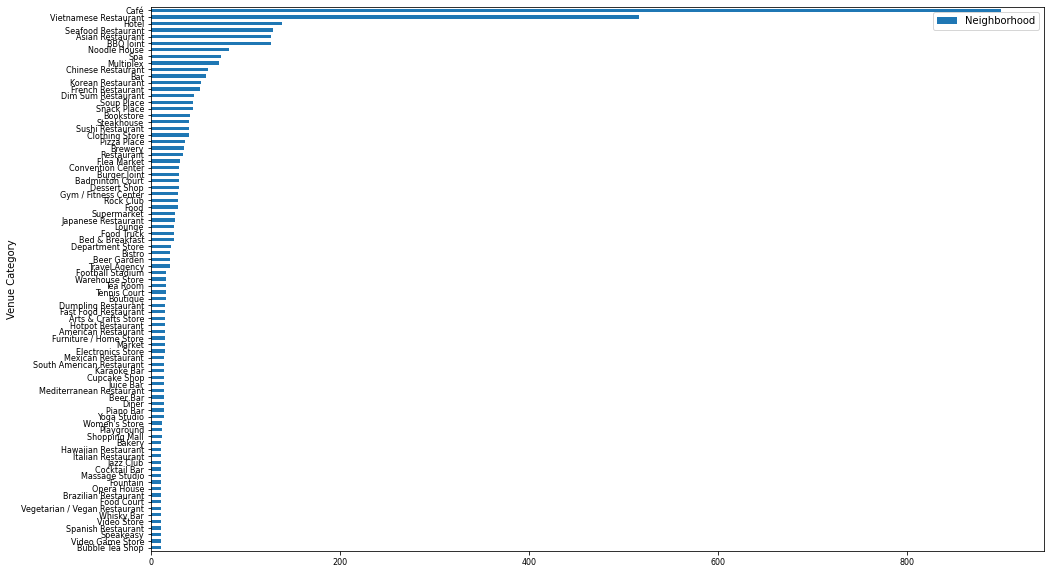

In [ ]:
import matplotlib.pyplot as plt
HCM_Plot.sort_values('Neighborhood',inplace=True)
HCM_Plot.plot.barh(x='Venue Category', y='Neighborhood', fontsize = 8, figsize=(16, 10))
plt.savefig("HCM_Plot.png")

#METHODOLOGY

## Clustering the venue in HCM city


First, let's write a function to sort the venues in descending order.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.



In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = HCM_grouped['Neighborhood']

for ind in np.arange(HCM_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HCM_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Phường 1, Quận 10",Café,Vietnamese Restaurant,Sushi Restaurant,Korean Restaurant,Dessert Shop,Multiplex,Spa,Bookstore,Steakhouse,Hotpot Restaurant
1,"Phường 1, Quận 11",Café,Pizza Place,Yoga Studio,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store
2,"Phường 1, Quận 3",Café,Vietnamese Restaurant,BBQ Joint,French Restaurant,Asian Restaurant,Korean Restaurant,Seafood Restaurant,Rock Club,Bar,Noodle House
3,"Phường 1, Quận 4",Seafood Restaurant,Snack Place,Vietnamese Restaurant,Japanese Restaurant,Furniture / Home Store,BBQ Joint,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop
4,"Phường 1, Quận 5",Chinese Restaurant,Vietnamese Restaurant,Noodle House,Dim Sum Restaurant,Café,Dessert Shop,Brewery,Hotel,Asian Restaurant,BBQ Joint


Cluster Neighborhoods

In [ ]:
# set number of clusters
kclusters = 5

HCM_grouped_clustering = HCM_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HCM_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 0, 2, 2, 2, 3, 4, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.



In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

HCM_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
HCM_merged = HCM_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='area')

HCM_merged.head() # check the last columns!

,Unnamed: 0,ward,district,area,Lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9214,Phường Tân Định,Quận 1,"Phường Tân Định, Quận 1",10.77454,106.699184,2.0,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
1,9215,Phường Đa Kao,Quận 1,"Phường Đa Kao, Quận 1",10.77454,106.699184,2.0,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
2,9216,Phường Bến Nghé,Quận 1,"Phường Bến Nghé, Quận 1",10.77454,106.699184,2.0,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
3,9217,Phường Bến Thành,Quận 1,"Phường Bến Thành, Quận 1",10.77454,106.699184,2.0,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
4,9218,Phường Nguyễn Thái Bình,Quận 1,"Phường Nguyễn Thái Bình, Quận 1",10.77454,106.699184,2.0,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar


Change the type of Cluster column to Int

In [ ]:
HCM_merged= HCM_merged.rename(columns={'Cluster Labels': 'Cluster'})
HCM_merged= HCM_merged.dropna()
HCM_merged['Cluster'] = HCM_merged.Cluster.astype(int)

Finally, let's visualize the resulting clusters



In [ ]:
# create map
map_clusters = folium.Map(location=[HCMlat, HCMlong], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HCM_merged['Lat'], HCM_merged['lon'], HCM_merged['area'], HCM_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [ ]:
#Cluster_1
Cluster_1 = HCM_merged.loc[HCM_merged['Cluster'] == 0,HCM_merged.columns[[1] + list(range(3, HCM_merged.shape[1]))]]
Cluster_1.head()

,ward,area,Lat,lon,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
123,Phường Thảo Điền,"Phường Thảo Điền, Quận 2",10.791116,106.736729,0,Seafood Restaurant,Bookstore,Department Store,Flea Market,French Restaurant,Electronics Store,Cupcake Shop,Gym / Fitness Center,Dessert Shop,Dim Sum Restaurant
124,Phường An Phú,"Phường An Phú, Quận 2",10.791116,106.736729,0,Seafood Restaurant,Bookstore,Department Store,Flea Market,French Restaurant,Electronics Store,Cupcake Shop,Gym / Fitness Center,Dessert Shop,Dim Sum Restaurant
125,Phường Bình An,"Phường Bình An, Quận 2",10.791116,106.736729,0,Seafood Restaurant,Bookstore,Department Store,Flea Market,French Restaurant,Electronics Store,Cupcake Shop,Gym / Fitness Center,Dessert Shop,Dim Sum Restaurant
126,Phường Bình Trưng Đông,"Phường Bình Trưng Đông, Quận 2",10.791116,106.736729,0,Seafood Restaurant,Bookstore,Department Store,Flea Market,French Restaurant,Electronics Store,Cupcake Shop,Gym / Fitness Center,Dessert Shop,Dim Sum Restaurant
127,Phường Bình Trưng Tây,"Phường Bình Trưng Tây, Quận 2",10.791116,106.736729,0,Seafood Restaurant,Bookstore,Department Store,Flea Market,French Restaurant,Electronics Store,Cupcake Shop,Gym / Fitness Center,Dessert Shop,Dim Sum Restaurant


In [ ]:
#Cluster_2
Cluster_2 = HCM_merged.loc[HCM_merged['Cluster'] == 1,HCM_merged.columns[[1] + list(range(3, HCM_merged.shape[1]))]]
Cluster_2.head()

,ward,area,Lat,lon,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
97,Phường Tân Sơn Nhì,"Phường Tân Sơn Nhì, Quận Tân Phú",10.79164,106.627302,1,Café,Vietnamese Restaurant,BBQ Joint,Yoga Studio,Flea Market,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant
98,Phường Tây Thạnh,"Phường Tây Thạnh, Quận Tân Phú",10.79164,106.627302,1,Café,Vietnamese Restaurant,BBQ Joint,Yoga Studio,Flea Market,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant
99,Phường Sơn Kỳ,"Phường Sơn Kỳ, Quận Tân Phú",10.79164,106.627302,1,Café,Vietnamese Restaurant,BBQ Joint,Yoga Studio,Flea Market,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant
100,Phường Tân Quý,"Phường Tân Quý, Quận Tân Phú",10.79164,106.627302,1,Café,Vietnamese Restaurant,BBQ Joint,Yoga Studio,Flea Market,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant
101,Phường Tân Thành,"Phường Tân Thành, Quận Tân Phú",10.79164,106.627302,1,Café,Vietnamese Restaurant,BBQ Joint,Yoga Studio,Flea Market,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant


In [ ]:
#Cluster_3
Cluster_3 = HCM_merged.loc[HCM_merged['Cluster'] == 2,HCM_merged.columns[[1] + list(range(3, HCM_merged.shape[1]))]]
Cluster_3.head()

,ward,area,Lat,lon,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phường Tân Định,"Phường Tân Định, Quận 1",10.77454,106.699184,2,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
1,Phường Đa Kao,"Phường Đa Kao, Quận 1",10.77454,106.699184,2,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
2,Phường Bến Nghé,"Phường Bến Nghé, Quận 1",10.77454,106.699184,2,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
3,Phường Bến Thành,"Phường Bến Thành, Quận 1",10.77454,106.699184,2,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar
4,Phường Nguyễn Thái Bình,"Phường Nguyễn Thái Bình, Quận 1",10.77454,106.699184,2,Café,Vietnamese Restaurant,Hotel,Clothing Store,Spa,Asian Restaurant,Burger Joint,BBQ Joint,Multiplex,Bar


In [ ]:
#Cluster_4
Cluster_4 = HCM_merged.loc[HCM_merged['Cluster'] == 3,HCM_merged.columns[[1] + list(range(3, HCM_merged.shape[1]))]]
Cluster_4.head()

,ward,area,Lat,lon,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Phường 13,"Phường 13, Quận Bình Thạnh",10.804659,106.707848,3,Soup Place,Travel Agency,Yoga Studio,Electronics Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
63,Phường 11,"Phường 11, Quận Bình Thạnh",10.804659,106.707848,3,Soup Place,Travel Agency,Yoga Studio,Electronics Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
64,Phường 27,"Phường 27, Quận Bình Thạnh",10.804659,106.707848,3,Soup Place,Travel Agency,Yoga Studio,Electronics Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
65,Phường 26,"Phường 26, Quận Bình Thạnh",10.804659,106.707848,3,Soup Place,Travel Agency,Yoga Studio,Electronics Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
66,Phường 12,"Phường 12, Quận Bình Thạnh",10.804659,106.707848,3,Soup Place,Travel Agency,Yoga Studio,Electronics Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


In [ ]:
#Cluster_5
Cluster_5 = HCM_merged.loc[HCM_merged['Cluster'] == 4,HCM_merged.columns[[1] + list(range(3, HCM_merged.shape[1]))]]
Cluster_5.head()

,ward,area,Lat,lon,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Phường 15,"Phường 15, Quận Gò Vấp",10.84015,106.671083,4,Warehouse Store,Boutique,Tea Room,Yoga Studio,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
47,Phường 13,"Phường 13, Quận Gò Vấp",10.84015,106.671083,4,Warehouse Store,Boutique,Tea Room,Yoga Studio,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
48,Phường 17,"Phường 17, Quận Gò Vấp",10.84015,106.671083,4,Warehouse Store,Boutique,Tea Room,Yoga Studio,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
49,Phường 6,"Phường 6, Quận Gò Vấp",10.84015,106.671083,4,Warehouse Store,Boutique,Tea Room,Yoga Studio,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
50,Phường 16,"Phường 16, Quận Gò Vấp",10.84015,106.671083,4,Warehouse Store,Boutique,Tea Room,Yoga Studio,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


## Explore the Cafe shope in HCM City


Make a dataframe of Coffee shop of HCM city

In [ ]:
HCM_cafe = HCM_venues.loc[HCM_venues['Venue Category'] == 'Café']

Make the report which area has the most café shop in HCM city

In [ ]:
HCM_cf = HCM_cafe.groupby('Neighborhood').count()
HCM_cf.sort_values('Venue',inplace=True, ascending=False)
HCM_cf.to_csv('X.csv')
HCM_cf = pd.read_csv('X.csv')
HCM_cf = HCM_cf.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1)
HCM_cf= HCM_cf.rename(columns={'Venue': 'Total'})
HCM_cf.head()

,Neighborhood,Total
0,"Phường Đa Kao, Quận 1",16
1,"Phường Cầu Ông Lãnh, Quận 1",16
2,"Phường Bến Thành, Quận 1",16
3,"Phường Cô Giang, Quận 1",16
4,"Phường Cầu Kho, Quận 1",16


Creating the map which illustrate the existing Café shop in Ho Chi Minh City

In [ ]:
# create map of Toronto using latitude and longitude values
map_HCM = folium.Map(location=[HCMlat, HCMlong], zoom_start=12)

# add markers to map
for Lat, lon, Neighborhood in zip(HCM_cafe['Venue Latitude'], HCM_cafe['Venue Longitude'], HCM_cafe['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, lon],
        radius=5,
        popup="O Day Roi!",
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HCM)  
    
map_HCM

Creating the headmap of Café shop

In [ ]:
from folium import plugins

map_HCM = folium.Map(location=[HCMlat, HCMlong], zoom_start=14)

def add_markers(HCM_cafe):
    for (j, row) in HCM_cafe.iterrows():
        label = folium.Popup(row["Venue"], parse_html=True)
        folium.CircleMarker(
            [row["Venue Latitude"], row["Venue Longitude"]],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_DaNang)

add_markers(HCM_cafe)
hm_data = HCM_cafe[["Venue Latitude", "Venue Longitude"]].to_numpy().tolist()
map_HCM.add_child(plugins.HeatMap(hm_data))

map_HCM

#CONLUSION


In this Project, I already helped Tom to solve his problems such as using K-mean Clustering to find some similar place as his current house for Tom to buy a new house in Ho Chi Minh City. I also used the EDA to explore which is the most venue in Ho Chi Minh city. I tried to find the best place for Tom to open the Coffee Shop in Ho Chi Minh City. The results are valuable references for Tom to consider. 
I hope that based on found insights, Tom will make a bestter decision in the near future.

Reference:

[1] Capstone Project - The Battle of Neighborhoods 

https://dev.to/chijade/capstone-project-the-battle-of-neighborhoods-4ha3

[2] Capstone Project — Battle of Neighborhoods in Dong Da District, Ha Noi

https://medium.com/@nguynvnc_45259/capstone-project-battle-of-neighborhoods-in-dong-da-district-ha-noi-66892ec0c9d1

[3] Battle of Neighborhoods in Ho Chi Minh City

https://medium.com/@thanhttrn/battle-of-neighborhoods-in-hochiminh-city-ae85173e61
